In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
# Folder which contains all the images, which are not split into train and validation
data_dir = './images/images/'

In [140]:
batch_size = 8
img_height = 224
img_width = 224

In [141]:
# ImageDataGenerator used to split the images into train and validation
image_generator = ImageDataGenerator(
                                    rescale=1/255, 
                                    validation_split=0.2,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest',)  

In [142]:
train_dataset = image_generator.flow_from_directory(
                                    directory=data_dir,
                                    shuffle=True,
                                    target_size=(img_height, img_width), 
                                    subset="training",
                                    class_mode='binary',
                                    color_mode='rgb',
                                    batch_size=batch_size,)


Found 184 images belonging to 2 classes.


In [143]:
validation_dataset = image_generator.flow_from_directory(
                                    directory=data_dir,
                                    shuffle=True,
                                    target_size=(img_height, img_width), 
                                    subset="validation",
                                    class_mode='binary',
                                    color_mode='rgb',
                                    batch_size=batch_size,)

Found 45 images belonging to 2 classes.


(-0.5, 127.5, 127.5, -0.5)

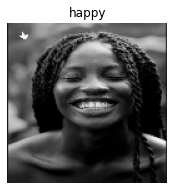

In [144]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 10))
ax = plt.subplot(3, 3, 1)
plt.imshow(images[1].numpy().astype("uint8"))
plt.title(class_names[labels[0]])
plt.axis("off")

In [145]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.25),


    tf.keras.layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(128, (3, 3), padding='same',activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(256, (3, 3), padding='same',activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same',activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(256, (3, 3), padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(512, (3, 3), padding='same',activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding='same',activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(512, (3, 3), padding='same',activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding='same',activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(512, (3, 3), padding='same',activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    # tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.5),

    # tf.keras.layers.Dense(32, activation='relu'),
    # tf.keras.layers.BatchNormalization(),
    # tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [146]:
print(model.summary())

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_123 (Conv2D)          (None, 225, 225, 64)      1792      
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 223, 223, 64)      36928     
_________________________________________________________________
max_pooling2d_91 (MaxPooling (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 109, 109, 128)     73856     
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 107, 107, 128)     147584    
_________________________________________________________________
max_pooling2d_92 (MaxPooling (None, 53, 53, 128)       0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 51, 51, 256)     

In [130]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy'],
)

In [131]:
history = model.fit(
  train_dataset,
  validation_data=validation_dataset,
  batch_size=batch_size,
  epochs=30,
  verbose=1,
)

Epoch 1/30
23/23 [==============================] - 2s 77ms/step - loss: 0.6939 - accuracy: 0.4505 - val_loss: 0.6926 - val_accuracy: 0.5333
Epoch 2/30
23/23 [==============================] - 1s 47ms/step - loss: 0.6921 - accuracy: 0.5361 - val_loss: 0.6919 - val_accuracy: 0.5333
Epoch 3/30
23/23 [==============================] - 1s 48ms/step - loss: 0.6897 - accuracy: 0.5607 - val_loss: 0.6911 - val_accuracy: 0.5333
Epoch 4/30
23/23 [==============================] - 1s 48ms/step - loss: 0.6963 - accuracy: 0.4839 - val_loss: 0.6914 - val_accuracy: 0.5333
Epoch 5/30
23/23 [==============================] - 1s 51ms/step - loss: 0.6915 - accuracy: 0.5129 - val_loss: 0.6927 - val_accuracy: 0.5333
Epoch 6/30
23/23 [==============================] - 1s 52ms/step - loss: 0.6803 - accuracy: 0.6064 - val_loss: 0.6921 - val_accuracy: 0.5333
Epoch 7/30
23/23 [==============================] - 1s 45ms/step - loss: 0.6904 - accuracy: 0.5357 - val_loss: 0.6930 - val_accuracy: 0.5333
Epoch 8/30
23

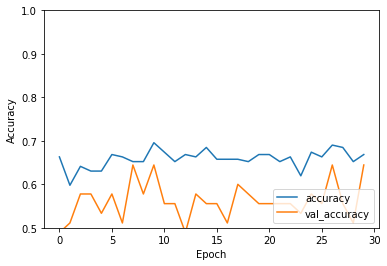

In [102]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [ ]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.ylim([0.5, 1])
plt.legend()